# Observable Trends
## Trend 1:
### As we get closer to the equator (latitude = 0) we observed that the weather gets warmer than compared to opposite sides of positive and negative latitude values. 
## Trend 2:
### Latitude values do not affect Humidity(%), Wind Speed(MPH) and Cloudiness(%). 
## Trend 3:
### Creating Northern and Southern hemisphere scatter plots helped support the trend 2 analysis. 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [4]:
# Create empty lists to hold the following values: 
citys = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Created for loop to go throug each city if the name is cities list is actually city or not. If it as actually city then we are getting that city data. 

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        response = requests.get(query_url + city).json()
        citys.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        windSpeed.append(response["wind"]["speed"])
        print(f'Retrieving {city} information for city {len(citys)}')
    except KeyError:
        print(f'{city} Does Not Exist!')


    
    
    
    

Retrieving ribeira grande information for city 1
Retrieving airai information for city 2
Retrieving cockburn town information for city 3
Retrieving san patricio information for city 4
Retrieving port alfred information for city 5
Retrieving tuktoyaktuk information for city 6
Retrieving kotido information for city 7
Retrieving kapaa information for city 8
Retrieving aykhal information for city 9
Retrieving hermanus information for city 10
Retrieving rikitea information for city 11
Retrieving khatanga information for city 12
Retrieving aswan information for city 13
Retrieving barrow information for city 14
Retrieving ranong information for city 15
Retrieving esperance information for city 16
Retrieving jamestown information for city 17
Retrieving ushuaia information for city 18
Retrieving sitka information for city 19
Retrieving lasa information for city 20
Retrieving sidi ali information for city 21
Retrieving meulaboh information for city 22
Retrieving cuxhaven information for city 23


hunza Does Not Exist!
Retrieving sorong information for city 178
Retrieving flin flon information for city 179
Retrieving lavrentiya information for city 180
Retrieving hilo information for city 181
Retrieving harper information for city 182
Retrieving jining information for city 183
Retrieving sao filipe information for city 184
Retrieving virginia beach information for city 185
Retrieving ca mau information for city 186
Retrieving hithadhoo information for city 187
Retrieving the pas information for city 188
Retrieving naryan-mar information for city 189
Retrieving tecoanapa information for city 190
Retrieving kasempa information for city 191
Retrieving taltal information for city 192
umzimvubu Does Not Exist!
Retrieving hay river information for city 193
Retrieving savannah bight information for city 194
Retrieving pevek information for city 195
Retrieving mar del plata information for city 196
Retrieving port hardy information for city 197
Retrieving tromso information for city 198

Retrieving brigantine information for city 356
Retrieving half moon bay information for city 357
Retrieving chapais information for city 358
Retrieving kisangani information for city 359
Retrieving semnan information for city 360
Retrieving khasan information for city 361
Retrieving boyolangu information for city 362
Retrieving mogadishu information for city 363
Retrieving sambava information for city 364
Retrieving west fargo information for city 365
Retrieving tual information for city 366
Retrieving nhulunbuy information for city 367
Retrieving fortuna information for city 368
Retrieving kyrksaeterora information for city 369
Retrieving hami information for city 370
Retrieving abu zabad information for city 371
Retrieving bilibino information for city 372
Retrieving ulladulla information for city 373
grand river south east Does Not Exist!
Retrieving khovu-aksy information for city 374
Retrieving saint-georges information for city 375
Retrieving seoul information for city 376
Retriev

Retrieving mehamn information for city 534
Retrieving tacuarembo information for city 535
oinoussai Does Not Exist!
Retrieving gimbi information for city 536
Retrieving vao information for city 537
Retrieving dawei information for city 538
Retrieving laguna information for city 539
Retrieving cagliliog information for city 540
Retrieving ningyang information for city 541
Retrieving bemidji information for city 542
Retrieving santa rosa information for city 543
Retrieving guozhen information for city 544
Retrieving sena madureira information for city 545
Retrieving kretinga information for city 546
Retrieving teknaf information for city 547
Retrieving santa lucia information for city 548
Retrieving loei information for city 549
Retrieving batagay-alyta information for city 550
Retrieving kambove information for city 551
Retrieving saint-joseph information for city 552
Retrieving matagami information for city 553
cape elizabeth Does Not Exist!
Retrieving iwanai information for city 554
R

In [6]:
# Created data frame with actually cities and their properties from the empty list created above
City_df = pd.DataFrame({
    "City": citys,
    "Country": country,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": maxTemp,
    "Wind Speed": windSpeed
}
)
City_df.to_csv("Weather.csv", index = False, header = True)
City_df.head()

City Country  Cloudiness        Date  Humidity  Latitude  \
0  Ribeira Grande      PT         100  1587771966        89     38.52   
1           Airai      TL          73  1587771966        61     -8.93   
2   Cockburn Town      TC           0  1587771966        80     21.46   
3    San Patricio      MX          40  1587771966        83     19.22   
4     Port Alfred      ZA          94  1587771966        93    -33.59   

   Longitude  Max Temperature  Wind Speed  
0     -28.70            62.17       12.06  
1     125.41            66.54        5.06  
2     -71.14            79.70       20.00  
3    -104.70            80.60        9.17  
4      26.89            66.00        3.00

In [7]:
# def plotting (x, y):
#     plt.scatter(x,y)
#     plt.xlabel("Latitude")
#     plt.grid()
#     plt.ylim(0, max(y)+20)
#     return


In [8]:
plot_temp = City_df["Max Temperature"]
plot_humid = City_df["Humidity"]
plot_cloud = City_df["Cloudiness"]
plot_speed = City_df["Wind Speed"]
plot_lat = City_df["Latitude"]

scatter = [plot_temp, plot_humid, plot_cloud, plot_speed]
y_labels = ["Max Temperature(F)", "Humidity(%)", "Cloudiness(%)", "Wind Speed(MPH)"]


<IPython.core.display.Javascript object>


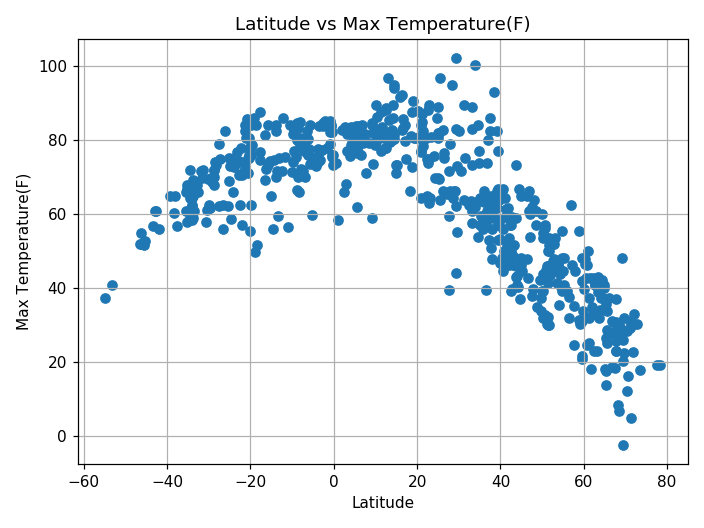

This is a scatter plot comparing Max Temperature at different latitudes


<IPython.core.display.Javascript object>


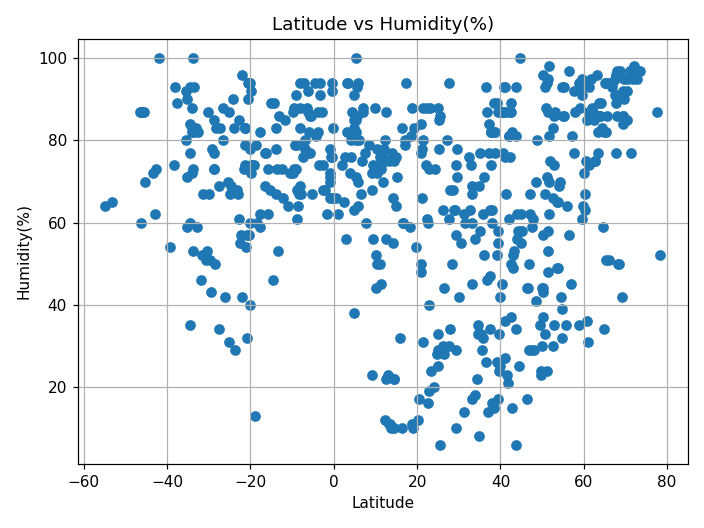

This is a scatter plot comparing Humidity at different latitudes


<IPython.core.display.Javascript object>


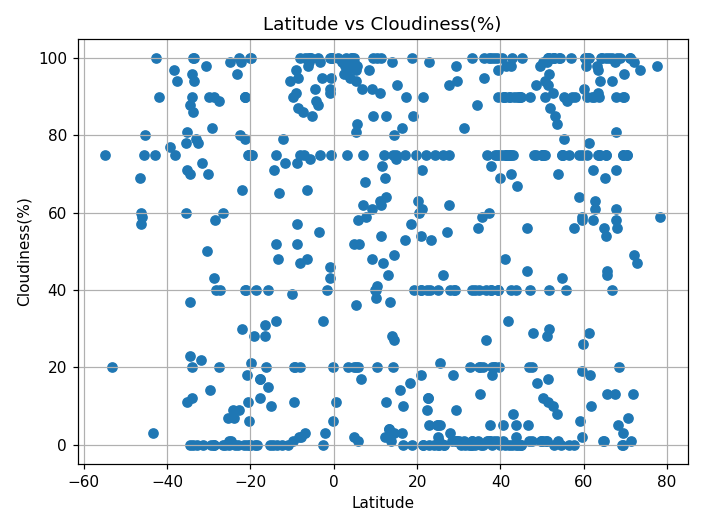

This is a scatter plot comparing Cloudiness at different latitudes


<IPython.core.display.Javascript object>


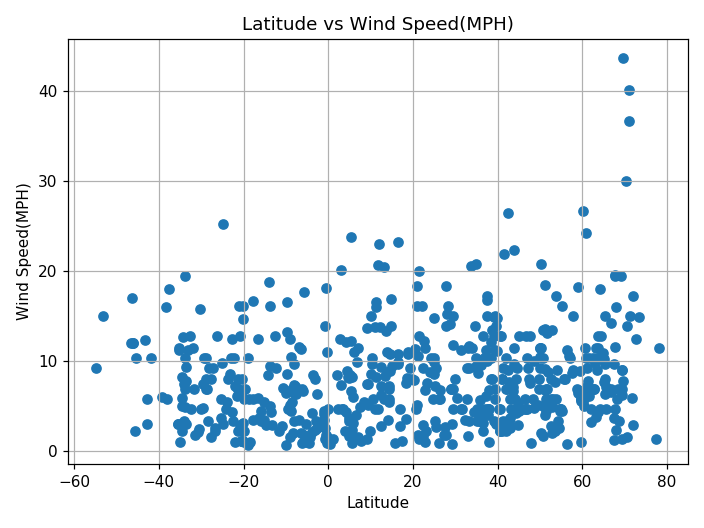

This is a scatter plot comparing Wind Speed at different latitudes


In [9]:
# Created for-loop to plot temperature, humidity, cloudiness and speed against latitude. 
for i in range(4):
    plt.figure()
    plt.scatter(plot_lat, scatter[i])
    plt.title(f'Latitude vs {y_labels[i]}')
    plt.grid()
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_labels[i]}')
    plt.savefig(f"Images/Latitude vs {y_labels[i]}.png")
    plt.show()
    plt.tight_layout()
    
    if y_labels[i] == "Max Temperature(F)":
        print("This is a scatter plot comparing Max Temperature at different latitudes")
    elif y_labels[i] == "Humidity(%)":
        print("This is a scatter plot comparing Humidity at different latitudes")
    elif y_labels[i] == "Cloudiness(%)":
        print("This is a scatter plot comparing Cloudiness at different latitudes")
    elif y_labels[i] == "Wind Speed(MPH)":
        print("This is a scatter plot comparing Wind Speed at different latitudes")
    


In [10]:
north = City_df[City_df["Latitude"] > 0]
south = City_df[City_df["Latitude"] < 0]

plot_north_lat = north["Latitude"]
plot_north_temp = north["Max Temperature"]
plot_north_humid = north["Humidity"]
plot_north_cloud = north["Cloudiness"]
plot_north_speed = north["Wind Speed"]

plot_south_lat = south["Latitude"]
plot_south_temp = south["Max Temperature"]
plot_south_humid = south["Humidity"]
plot_south_cloud = south["Cloudiness"]
plot_south_speed = south["Wind Speed"]

In [11]:
x_plots = [plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat]
y_plots = [plot_north_temp, plot_south_temp, plot_north_humid, plot_south_humid, plot_north_cloud, plot_south_cloud, plot_north_speed, plot_south_speed ]
x_labab = ["Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude"]
y_labab = ["Max Temperature(F)", "Max Temperature(F)", "Humidity(%)", "Humidity(%)", "Cloudiness(%)", "Cloudiness(%)", "Wind Speed (MPH)", "Wind Speed (MPH)"]

<IPython.core.display.Javascript object>


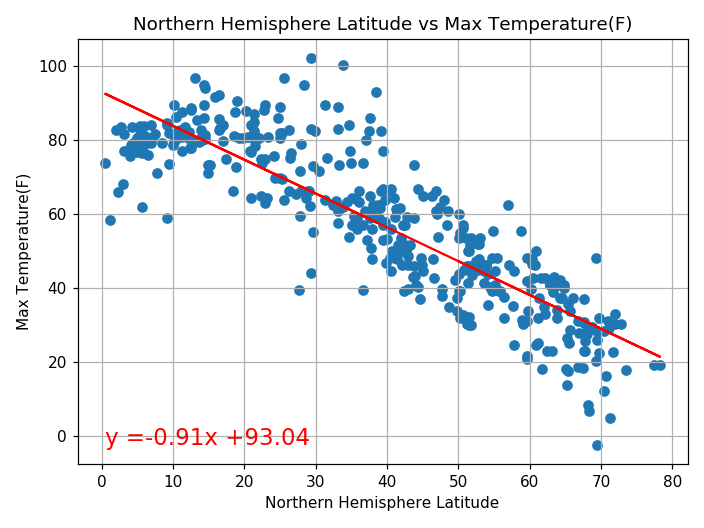

The r-squared is: 0.7548971916767819


<IPython.core.display.Javascript object>


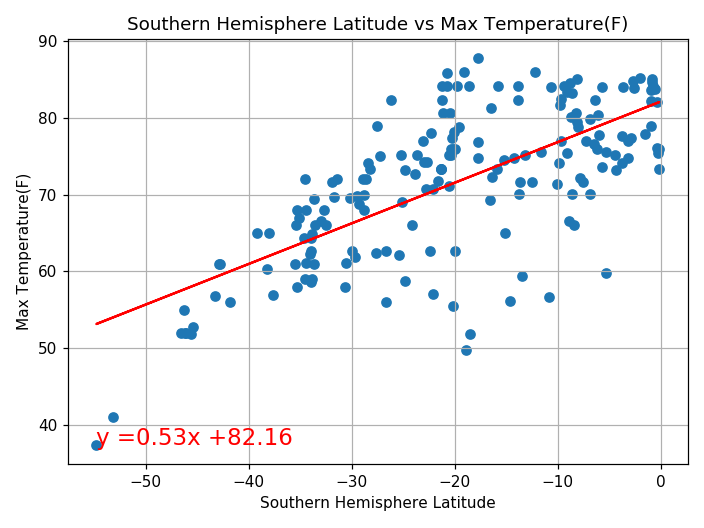

The r-squared is: 0.4805540122617664
This is a scatter plot comparing Max Temperature at different latitudes in different hemispheres


<IPython.core.display.Javascript object>


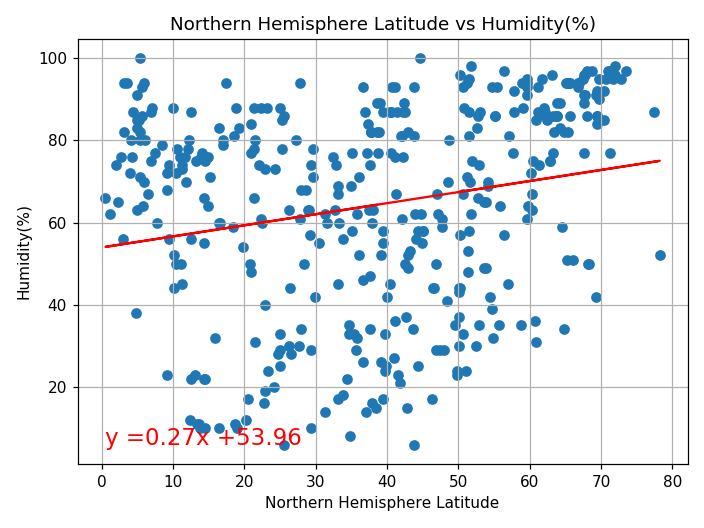

The r-squared is: 0.047771007587464366


<IPython.core.display.Javascript object>


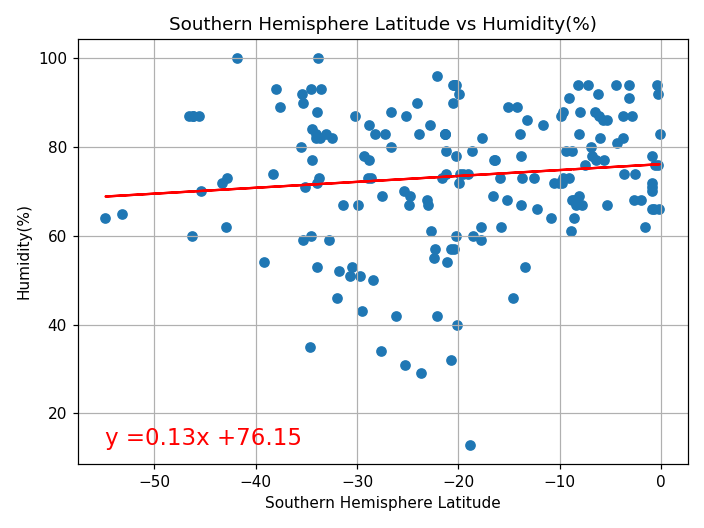

The r-squared is: 0.012411217936116508
This is a scatter plot comparing Humidity at different latitudes in different hemispheres


<IPython.core.display.Javascript object>


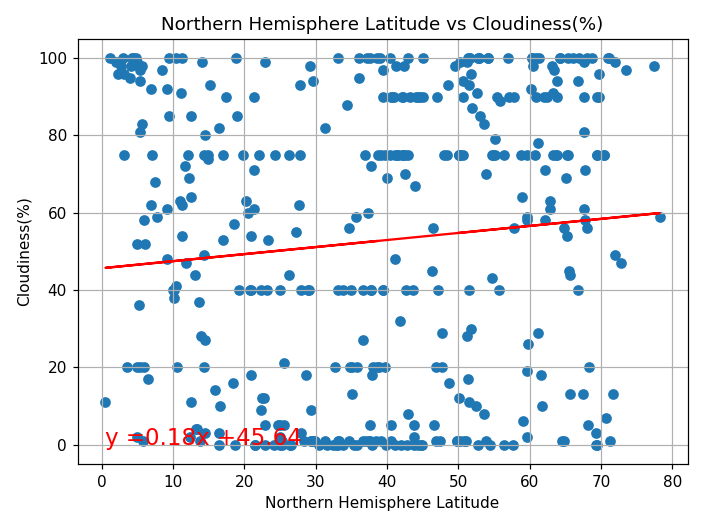

The r-squared is: 0.00995800967446105


<IPython.core.display.Javascript object>


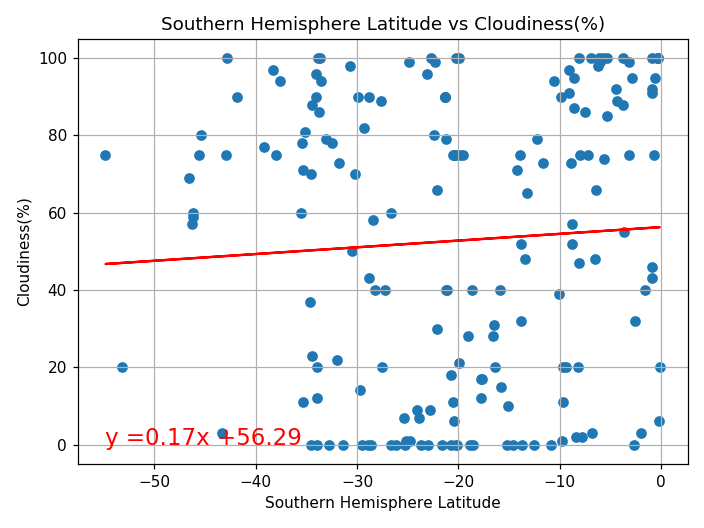

The r-squared is: 0.003703864107280802
This is a scatter plot comparing Cloudiness at different latitudes in different hemispheres


<IPython.core.display.Javascript object>


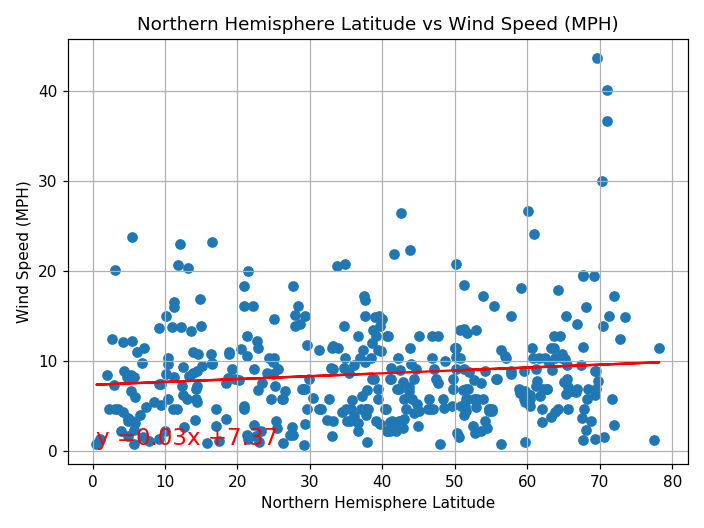

The r-squared is: 0.01226120896340397


<IPython.core.display.Javascript object>


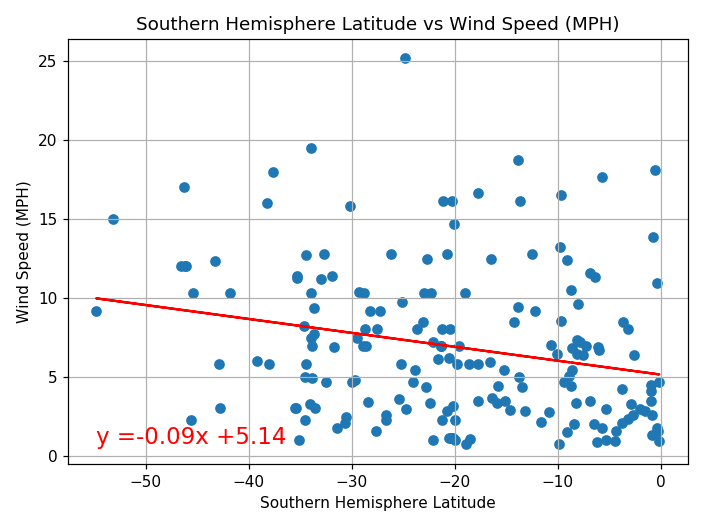

The r-squared is: 0.056605554156624376
This is a scatter plot comparing Wind Speed at different latitudes in different hemispheres


In [12]:
# Created for-loop to plot temperature, humidity, cloudiness and speed against latitude for northern and southern hemisphere.

for i in range(8):
    plt.figure()
    plt.scatter(x_plots[i], y_plots[i])
    plt.title(f'{x_labab[i]} vs {y_labab[i]}')
    plt.grid()
    plt.xlabel(f'{x_labab[i]}')
    plt.ylabel(f'{y_labab[i]}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_plots[i], y_plots[i])
    regress_values = x_plots[i]*slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_plots[i], regress_values, "r-")
    plt.annotate(line_eq, (min(x_plots[i]), min(y_plots[i])), fontsize = 15, color = "red")
    print(f'The r-squared is: {rvalue**2}')
    plt.savefig(f"Images/{x_labab[i]} vs {y_labab[i]}.png")
    plt.show()
    plt.tight_layout()
    
    if y_labab[i] == "Max Temperature(F)" and x_labab[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Max Temperature at different latitudes in different hemispheres")
    elif y_labab[i] == "Humidity(%)" and x_labab[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Humidity at different latitudes in different hemispheres")
    elif y_labab[i] == "Cloudiness(%)" and x_labab[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Cloudiness at different latitudes in different hemispheres")
    elif y_labab[i] == "Wind Speed (MPH)" and x_labab[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Wind Speed at different latitudes in different hemispheres")
    